In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from matplotlib.ticker import MultipleLocator

import sys
sys.path.append('../')
from kinetic_fit.equations import *

Loding data into dataframes:

In [2]:
df_125nM = pd.read_excel('Kcat_Km.xlsx', sheet_name='Sheet1', skiprows=3, nrows=9,  usecols='A:G')
df_250nM = pd.read_excel('Kcat_Km.xlsx', sheet_name='Sheet1', skiprows=3, nrows=9,  usecols='J:P')
df_500nM = pd.read_excel('Kcat_Km.xlsx', sheet_name='Sheet1', skiprows=3, nrows=9,  usecols='S:Y')
df_1uM = pd.read_excel('Kcat_Km.xlsx', sheet_name='Sheet1', skiprows=17, nrows=8,  usecols='A:G')
df_2uM = pd.read_excel('Kcat_Km.xlsx', sheet_name='Sheet1', skiprows=17, nrows=8,  usecols='J:P')

Calculating K values for each event:

In [3]:
# Normalizing
def normalize(df_):
    df_.columns = ['Time (min)','A0','A1','A2','A3','A4','A5']
    return pd.concat([df_['Time (min)'],df_.iloc[:,1:].div(df_.iloc[:,1:].sum(axis=1), axis=0)], axis=1)
    
df_125nM = normalize(df_125nM)
df_250nM = normalize(df_250nM)
df_500nM = normalize(df_500nM)
df_1uM = normalize(df_1uM)
df_2uM = normalize(df_2uM)

In [32]:
k_vals = {'125nM':df_125nM, '250nM':df_250nM, '500nM':df_500nM, '1µM':df_1uM, '2µM':df_2uM}
for key in k_vals.keys():
    df = k_vals[key]
    fit = ParameterFitter(t = df['Time (min)'], A_ = [df['A0'], df['A1'], df['A2'], df['A3'], df['A4'], df['A5']])
    fit.fit()
    k_vals[key] = fit.get_parameters()

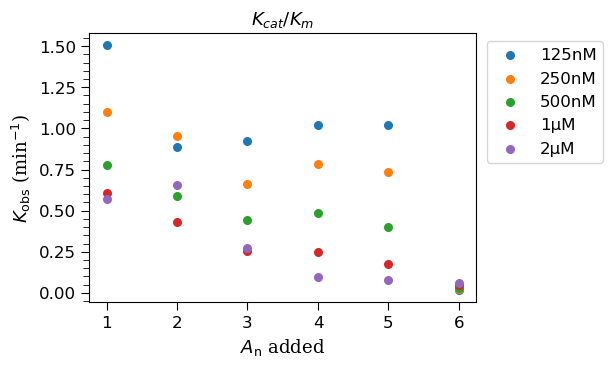

In [47]:
# # Plot k values
# fig, ax = plt.subplots(figsize=(5, 3.5))
# for key in k_vals.keys():
#     ax.scatter(np.arange(1, 7), k_vals[key], label=key, s=30)

# ax.set_ylabel(r'$K_{\text{obs}}$ (min$^{-1}$)', fontsize=13, family='serif')
# ax.set_xlabel(r'$A_{\text{n}}$ added', fontsize=13, family='serif')

# plt.minorticks_on()
# plt.tick_params(axis='both', which='major', labelsize=12, length=6)
# plt.gca().tick_params(axis='x', which='minor', bottom=False)
# plt.gca().yaxis.set_minor_locator(MultipleLocator(0.05))
# plt.tick_params(axis='y', which='minor', length=4)
# plt.title(r'$K_{cat}/K_{m}$', family='serif', fontsize=13)

# legend = ax.legend(fontsize=12, bbox_to_anchor=(1.005, 1), loc='upper left')
# plt.savefig('k_vs_A_1.png', dpi=250, bbox_inches='tight')

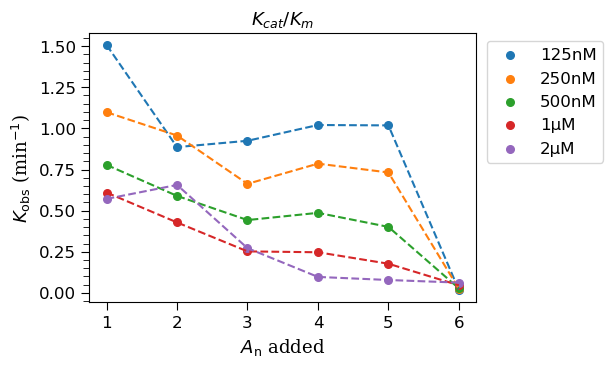

In [ ]:
# Plot k values
fig, ax = plt.subplots(figsize=(5, 3.5))
for key in k_vals.keys():
    if key in ['250nM', '500nM', '1µM']
    ax.scatter(np.arange(1, 7), k_vals[key], label=key, s=30)
    plt.plot(np.arange(1, 7),k_vals[key], '--')

ax.set_ylabel(r'$K_{\text{obs}}$ (min$^{-1}$)', fontsize=13, family='serif')
ax.set_xlabel(r'$A_{\text{n}}$ added', fontsize=13, family='serif')

plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=12, length=6)
plt.gca().tick_params(axis='x', which='minor', bottom=False)
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.05))
plt.tick_params(axis='y', which='minor', length=4)
plt.title(r'$K_{cat}/K_{m}$', family='serif', fontsize=13)

legend = ax.legend(fontsize=12, bbox_to_anchor=(1.005, 1), loc='upper left')
plt.savefig('k_vs_A_2.png', dpi=250, bbox_inches='tight')

In [6]:
# A_0(t=df['Time (min)'], k1=0.57150642,k2=0, k3=0, k4=0, k5=0, k6=0) # use this to show fits for each 5 cases

0    1.000000e+00
1    5.646742e-01
2    3.188569e-01
3    1.800503e-01
4    1.016697e-01
5    5.741027e-02
6    3.295939e-03
7    6.236600e-07
Name: Time (min), dtype: float64

In [7]:
# try contour plot